## Comparative border and non border county in the U.S. 

We analyze how employment, wages and population in U.S. evolved between 2007 and 2021. Also between 2016 and 2021

The border counties are:  San Diego (CA), Imperial (CA), Yuma (AZ), Pima (AZ), Santa Cruz (AZ), Cochise (AZ), Hidalgo (NM), Luna (NM) , Doña Ana (NM), El Paso (TX), Hudspeth (TX) , Jeff Davis (TX),  Presidio(TX),  Brewster(TX), Terrell (TX) , Val Verde(TX),  Kinney(TX) , Maverick(TX),  Webb(TX) , Zapata(TX),  Starr(TX) , Hidalgo(TX) ,  Cameron(TX)


In [1]:
#import libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
## small trick to improve our display
## Unfortunately appears not to work in Colab.
## will allow us to see dataframes side-by-side
from IPython.display import display, HTML

css = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(css))

In [3]:
## run the display code here
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
## open data
df = pd.read_csv("data/jobs-wages-population-us-merged-by-county.csv")
df

,Year,County,State,Description,Value,Border State,Border County
0,2007,Autauga,Alabama,Total Jobs,"14,956.00",No,No
1,2007,Baldwin,Alabama,Total Jobs,"81,452.00",No,No
2,2007,Barbour,Alabama,Total Jobs,"11,323.00",No,No
3,2007,Bibb,Alabama,Total Jobs,"4,885.00",No,No
4,2007,Blount,Alabama,Total Jobs,"11,974.00",No,No
...,...,...,...,...,...,...,...
420640,2021,Sweetwater,Wyoming,Population,"41,614.00",No,No
420641,2021,Teton,Wyoming,Population,"23,575.00",No,No
420642,2021,Uinta,Wyoming,Population,"20,635.00",No,No
420643,2021,Washakie,Wyoming,Population,"7,705.00",No,No


In [5]:
year = df["Year"].unique

In [6]:
df["Description"].unique()

array(['Total Jobs', 'Construction Jobs', 'Manufacturing Jobs',
       'Transportation Jobs', 'Total Income', 'Construction Income',
       'Manufacturing Income', 'Transportation Income', 'Population'],
      dtype=object)

In [7]:
dfpivot_border = pd.pivot_table(df.query("Year > 2006 & Year < 2022 & `Border County` == 'Yes'") , values='Value', index='Year', columns='Description')
dfpivot_border

Description,Construction Income,Construction Jobs,Manufacturing Income,Manufacturing Jobs,Population,Total Income,Total Jobs,Transportation Income,Transportation Jobs
Year,,,,,,,,,
2007,"579,333.00","11,470.33","657,294.75","9,383.38","262,076.43","9,067,546.30","115,563.90","207,705.05","5,364.36"
2008,"476,368.17","10,514.58","553,933.82","7,863.18","266,552.57","9,455,756.10","114,990.43","189,292.96","4,833.75"
2009,"422,759.21","9,149.88","595,631.46","8,469.42","270,774.70","9,325,069.63","111,396.00","180,954.48","4,730.57"
2010,"479,108.74","8,922.57","578,163.52","7,852.12","275,312.33","9,779,417.40","110,874.00","203,188.73","4,948.23"
2011,"437,572.48","8,825.30","618,832.25","8,251.96","278,714.00","10,341,940.07","113,613.93","242,059.00","5,014.00"
2012,"483,133.68","9,321.86","692,096.00","8,741.30","281,369.13","10,775,784.13","116,136.23","249,882.65","5,020.39"
2013,"491,874.30","9,302.22","660,067.08","8,487.25","283,257.03","11,029,007.20","118,957.87","259,238.82","5,312.73"
2014,"542,308.35","9,680.35","690,760.46","8,480.33","285,530.90","11,609,462.73","122,255.57","270,128.74","5,493.78"
2015,"520,889.20","9,211.96","718,067.40","8,480.84","287,427.80","12,159,730.20","125,528.03","281,005.04","6,243.17"


In [8]:
dfpivot_nonborder = pd.pivot_table(df.query("Year > 2006 & Year < 2022 & `Border County` == 'No'") , values='Value', index='Year', columns='Description').copy()
dfpivot_nonborder

Description,Construction Income,Construction Jobs,Manufacturing Income,Manufacturing Jobs,Population,Total Income,Total Jobs,Transportation Income,Transportation Jobs
Year,,,,,,,,,
2007,"203,002.25","3,906.13","342,024.97","5,058.34","94,818.77","3,785,261.56","48,177.95","134,868.64","2,500.56"
2008,"190,121.17","3,720.82","324,364.49","4,669.76","95,666.46","3,929,453.06","47,955.39","132,243.05","2,482.00"
2009,"166,693.39","3,250.20","305,173.62","4,395.52","96,451.44","3,799,586.02","46,139.92","128,253.89","2,390.48"
2010,"167,435.66","3,014.38","309,092.72","4,254.26","97,240.59","3,960,065.18","45,905.03","133,917.54","2,340.14"
2011,"171,056.41","3,009.64","326,081.21","4,353.68","97,996.88","4,193,896.68","47,031.69","146,316.80","2,465.10"
2012,"185,203.03","3,080.71","338,673.27","4,425.81","98,774.02","4,406,749.53","48,004.26","155,396.12","2,552.20"
2013,"194,770.03","3,200.87","344,027.69","4,482.53","99,524.74","4,465,174.02","49,070.94","161,491.08","2,602.75"
2014,"211,843.76","3,317.69","358,549.40","4,537.73","100,322.05","4,711,344.13","50,306.15","171,279.50","2,705.76"
2015,"224,541.89","3,382.13","372,178.30","4,583.68","101,130.60","4,935,706.06","51,562.07","186,955.80","3,002.25"


In [9]:
#Calculate percentage changes border
dfchange_border = dfpivot_border.copy()
dfchange_border['Construction Jobs'] = dfchange_border['Construction Jobs'] / dfchange_border['Construction Jobs'].iat[0] * 100 
dfchange_border['Construction Income'] = dfchange_border['Construction Income'] / dfchange_border['Construction Income'].iat[0] * 100
dfchange_border["Manufacturing Jobs"] = dfchange_border["Manufacturing Jobs"] / dfchange_border["Manufacturing Jobs"].iat[0] * 100
dfchange_border["Manufacturing Income"] = dfchange_border["Manufacturing Income"] / dfchange_border["Manufacturing Income"].iat[0] * 100
dfchange_border["Transportation Jobs"]= dfchange_border["Transportation Jobs"] / dfchange_border["Transportation Jobs"].iat[0] * 100
dfchange_border["Transportation Income"] = dfchange_border["Transportation Income"] / dfchange_border["Transportation Income"].iat[0] * 100
dfchange_border["Population"] = dfchange_border["Population"] / dfchange_border["Population"].iat[0] * 100
dfchange_border["Total Jobs"] = dfchange_border["Total Jobs"] / dfchange_border["Total Jobs"].iat[0] * 100 
dfchange_border["Total Income"]  = dfchange_border["Total Income"] / dfchange_border["Total Income"].iat[0] * 100
dfchange_border["Year"] = dfchange_border.index

In [10]:
dfchange_border

Description,Construction Income,Construction Jobs,Manufacturing Income,Manufacturing Jobs,Population,Total Income,Total Jobs,Transportation Income,Transportation Jobs,Year
Year,,,,,,,,,,
2007,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,2007
2008,82.23,91.67,84.27,83.80,101.71,104.28,99.50,91.14,90.11,2008
2009,72.97,79.77,90.62,90.26,103.32,102.84,96.39,87.12,88.19,2009
2010,82.70,77.79,87.96,83.68,105.05,107.85,95.94,97.83,92.24,2010
2011,75.53,76.94,94.15,87.94,106.35,114.05,98.31,116.54,93.47,2011
2012,83.39,81.27,105.29,93.16,107.36,118.84,100.50,120.31,93.59,2012
2013,84.90,81.10,100.42,90.45,108.08,121.63,102.94,124.81,99.04,2013
2014,93.61,84.39,105.09,90.38,108.95,128.03,105.79,130.05,102.41,2014
2015,89.91,80.31,109.25,90.38,109.67,134.10,108.62,135.29,116.38,2015


In [11]:
#Calculate percentage changes non border
dfchange_nonborder = dfpivot_nonborder.copy()
dfchange_nonborder['Construction Jobs'] = dfchange_nonborder['Construction Jobs'] / dfchange_nonborder['Construction Jobs'].iat[0] * 100 
dfchange_nonborder['Construction Income'] = dfchange_nonborder['Construction Income'] / dfchange_nonborder['Construction Income'].iat[0] * 100
dfchange_nonborder["Manufacturing Jobs"] = dfchange_nonborder["Manufacturing Jobs"] / dfchange_nonborder["Manufacturing Jobs"].iat[0] * 100
dfchange_nonborder["Manufacturing Income"] = dfchange_nonborder["Manufacturing Income"] / dfchange_nonborder["Manufacturing Income"].iat[0] * 100
dfchange_nonborder["Transportation Jobs"]= dfchange_nonborder["Transportation Jobs"] / dfchange_nonborder["Transportation Jobs"].iat[0] * 100
dfchange_nonborder["Transportation Income"] = dfchange_nonborder["Transportation Income"] / dfchange_nonborder["Transportation Income"].iat[0] * 100
dfchange_nonborder["Population"] = dfchange_nonborder["Population"] / dfchange_nonborder["Population"].iat[0] * 100
dfchange_nonborder["Total Jobs"] = dfchange_nonborder["Total Jobs"] / dfchange_nonborder["Total Jobs"].iat[0] * 100 
dfchange_nonborder["Total Income"]  = dfchange_nonborder["Total Income"] / dfchange_nonborder["Total Income"].iat[0] * 100
dfchange_nonborder["Year"] = dfchange_nonborder.index

In [12]:
dfchange_nonborder

Description,Construction Income,Construction Jobs,Manufacturing Income,Manufacturing Jobs,Population,Total Income,Total Jobs,Transportation Income,Transportation Jobs,Year
Year,,,,,,,,,,
2007,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,2007
2008,93.65,95.26,94.84,92.32,100.89,103.81,99.54,98.05,99.26,2008
2009,82.11,83.21,89.23,86.90,101.72,100.38,95.77,95.10,95.60,2009
2010,82.48,77.17,90.37,84.10,102.55,104.62,95.28,99.29,93.58,2010
2011,84.26,77.05,95.34,86.07,103.35,110.80,97.62,108.49,98.58,2011
2012,91.23,78.87,99.02,87.50,104.17,116.42,99.64,115.22,102.07,2012
2013,95.94,81.94,100.59,88.62,104.96,117.96,101.85,119.74,104.09,2013
2014,104.36,84.94,104.83,89.71,105.80,124.47,104.42,127.00,108.21,2014
2015,110.61,86.59,108.82,90.62,106.66,130.39,107.02,138.62,120.06,2015


### Jobs

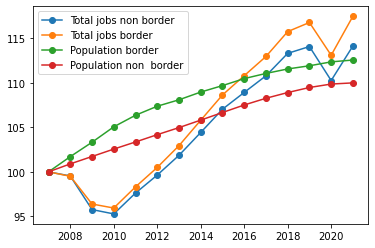

In [13]:
# Create a graphic 

x1 = dfchange_nonborder["Year"]
y1 = dfchange_nonborder["Total Jobs"]

x2 = dfchange_border["Year"]
y2 = dfchange_border["Total Jobs"]

x3 = dfchange_border["Year"]
y3 = dfchange_border["Population"]

x4 = dfchange_nonborder["Year"]
y4 = dfchange_nonborder["Population"]


fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Total jobs non border")
ax.plot(x2, y2, marker = "o", label = "Total jobs border")
ax.plot(x3, y3, marker = "o", label = "Population border")
ax.plot(x4, y4, marker = "o", label = "Population non  border")

ax.legend()

# plt.show()

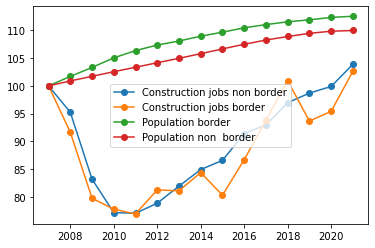

In [14]:
# Create a graphic 

x1 = dfchange_nonborder["Year"]
y1 = dfchange_nonborder["Construction Jobs"]

x2 = dfchange_border["Year"]
y2 = dfchange_border["Construction Jobs"]

x3 = dfchange_border["Year"]
y3 = dfchange_border["Population"]

x4 = dfchange_nonborder["Year"]
y4 = dfchange_nonborder["Population"]


fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Construction jobs non border")
ax.plot(x2, y2, marker = "o", label = "Construction jobs border")
ax.plot(x3, y3, marker = "o", label = "Population border")
ax.plot(x4, y4, marker = "o", label = "Population non  border")

ax.legend()

# plt.show()

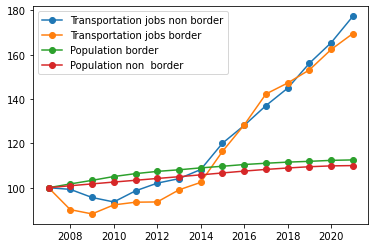

In [15]:
# Create a graphic 

x1 = dfchange_nonborder["Year"]
y1 = dfchange_nonborder["Transportation Jobs"]

x2 = dfchange_border["Year"]
y2 = dfchange_border["Transportation Jobs"]

x3 = dfchange_border["Year"]
y3 = dfchange_border["Population"]

x4 = dfchange_nonborder["Year"]
y4 = dfchange_nonborder["Population"]


fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Transportation jobs non border")
ax.plot(x2, y2, marker = "o", label = "Transportation jobs border")
ax.plot(x3, y3, marker = "o", label = "Population border")
ax.plot(x4, y4, marker = "o", label = "Population non  border")

ax.legend()

# plt.show()

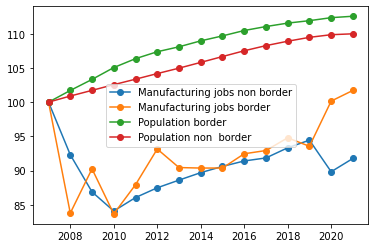

In [16]:
# Create a graphic 

x1 = dfchange_nonborder["Year"]
y1 = dfchange_nonborder["Manufacturing Jobs"]

x2 = dfchange_border["Year"]
y2 = dfchange_border["Manufacturing Jobs"]

x3 = dfchange_border["Year"]
y3 = dfchange_border["Population"]

x4 = dfchange_nonborder["Year"]
y4 = dfchange_nonborder["Population"]


fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Manufacturing jobs non border")
ax.plot(x2, y2, marker = "o", label = "Manufacturing jobs border")
ax.plot(x3, y3, marker = "o", label = "Population border")
ax.plot(x4, y4, marker = "o", label = "Population non  border")

ax.legend()

# plt.show()

### Income

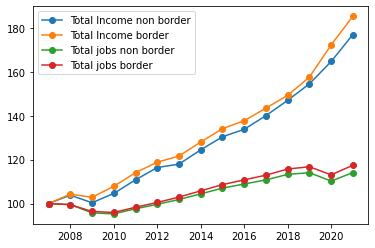

In [17]:
# Create a graphic 

x1 = dfchange_nonborder["Year"]
y1 = dfchange_nonborder["Total Income"]

x2 = dfchange_border["Year"]
y2 = dfchange_border["Total Income"]

x3 = dfchange_nonborder["Year"]
y3 = dfchange_nonborder["Total Jobs"]

x4 = dfchange_border["Year"]
y4 = dfchange_border["Total Jobs"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Total Income non border")
ax.plot(x2, y2, marker = "o", label = "Total Income border")
ax.plot(x3, y3, marker = "o", label = "Total jobs non border")
ax.plot(x4, y4, marker = "o", label = "Total jobs border")

ax.legend()

# plt.show()

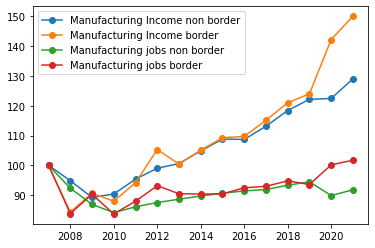

In [18]:
# Create a graphic 

x1 = dfchange_nonborder["Year"]
y1 = dfchange_nonborder["Manufacturing Income"]

x2 = dfchange_border["Year"]
y2 = dfchange_border["Manufacturing Income"]

x3 = dfchange_nonborder["Year"]
y3 = dfchange_nonborder["Manufacturing Jobs"]

x4 = dfchange_border["Year"]
y4 = dfchange_border["Manufacturing Jobs"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Manufacturing Income non border")
ax.plot(x2, y2, marker = "o", label = "Manufacturing Income border")
ax.plot(x3, y3, marker = "o", label = "Manufacturing jobs non border")
ax.plot(x4, y4, marker = "o", label = "Manufacturing jobs border")

ax.legend()

# plt.show()

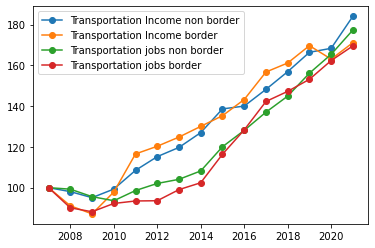

In [19]:
# Create a graphic 

x1 = dfchange_nonborder["Year"]
y1 = dfchange_nonborder["Transportation Income"]

x2 = dfchange_border["Year"]
y2 = dfchange_border["Transportation Income"]

x3 = dfchange_nonborder["Year"]
y3 = dfchange_nonborder["Transportation Jobs"]

x4 = dfchange_border["Year"]
y4 = dfchange_border["Transportation Jobs"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Transportation Income non border")
ax.plot(x2, y2, marker = "o", label = "Transportation Income border")
ax.plot(x3, y3, marker = "o", label = "Transportation jobs non border")
ax.plot(x4, y4, marker = "o", label = "Transportation jobs border")

ax.legend()

# plt.show()

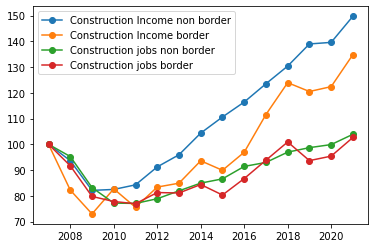

In [20]:
# Create a graphic 

x1 = dfchange_nonborder["Year"]
y1 = dfchange_nonborder["Construction Income"]

x2 = dfchange_border["Year"]
y2 = dfchange_border["Construction Income"]

x3 = dfchange_nonborder["Year"]
y3 = dfchange_nonborder["Construction Jobs"]

x4 = dfchange_border["Year"]
y4 = dfchange_border["Construction Jobs"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Construction Income non border")
ax.plot(x2, y2, marker = "o", label = "Construction Income border")
ax.plot(x3, y3, marker = "o", label = "Construction jobs non border")
ax.plot(x4, y4, marker = "o", label = "Construction jobs border")

ax.legend()

# plt.show()

### Post 2015

In [21]:
#Calculate percentage changes border
dfchange_border1621 = dfpivot_border.copy()
dfchange_border1621['Construction Jobs'] = dfchange_border1621['Construction Jobs'] / dfchange_border1621['Construction Jobs'].iat[9] * 100 
dfchange_border1621['Construction Income'] = dfchange_border1621['Construction Income'] / dfchange_border1621['Construction Income'].iat[9] * 100
dfchange_border1621["Manufacturing Jobs"] = dfchange_border1621["Manufacturing Jobs"] / dfchange_border1621["Manufacturing Jobs"].iat[9] * 100
dfchange_border1621["Manufacturing Income"] = dfchange_border1621["Manufacturing Income"] / dfchange_border1621["Manufacturing Income"].iat[9] * 100
dfchange_border1621["Transportation Jobs"]= dfchange_border1621["Transportation Jobs"] / dfchange_border1621["Transportation Jobs"].iat[9] * 100
dfchange_border1621["Transportation Income"] = dfchange_border1621["Transportation Income"] / dfchange_border1621["Transportation Income"].iat[9] * 100
dfchange_border1621["Population"] = dfchange_border1621["Population"] / dfchange_border1621["Population"].iat[9] * 100
dfchange_border1621["Total Jobs"] = dfchange_border1621["Total Jobs"] / dfchange_border1621["Total Jobs"].iat[9] * 100 
dfchange_border1621["Total Income"]  = dfchange_border1621["Total Income"] / dfchange_border1621["Total Income"].iat[9] * 100
dfchange_border1621["Year"] = dfchange_border1621.index

In [22]:
dfchange_border1621 = dfchange_border1621.query("Year > 2015")
dfchange_border1621

Description,Construction Income,Construction Jobs,Manufacturing Income,Manufacturing Jobs,Population,Total Income,Total Jobs,Transportation Income,Transportation Jobs,Year
Year,,,,,,,,,,
2016,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,2016
2017,115.12,108.22,104.92,100.51,100.52,104.15,101.94,109.42,110.87,2017
2018,127.88,116.40,110.30,102.53,100.98,108.37,104.46,112.51,114.74,2018
2019,124.33,108.04,113.03,101.18,101.30,114.41,105.39,118.45,119.35,2019
2020,126.29,110.05,129.64,108.32,101.70,125.06,102.07,113.84,126.51,2020
2021,139.12,118.41,136.77,110.01,101.89,134.53,106.02,119.49,132.12,2021


In [23]:
#Calculate percentage changes border
dfchange_nonborder1621 = dfpivot_nonborder.copy()
dfchange_nonborder1621['Construction Jobs'] = dfchange_nonborder1621['Construction Jobs'] / dfchange_nonborder1621['Construction Jobs'].iat[9] * 100 
dfchange_nonborder1621['Construction Income'] = dfchange_nonborder1621['Construction Income'] / dfchange_nonborder1621['Construction Income'].iat[9] * 100
dfchange_nonborder1621["Manufacturing Jobs"] = dfchange_nonborder1621["Manufacturing Jobs"] / dfchange_nonborder1621["Manufacturing Jobs"].iat[9] * 100
dfchange_nonborder1621["Manufacturing Income"] = dfchange_nonborder1621["Manufacturing Income"] / dfchange_nonborder1621["Manufacturing Income"].iat[9] * 100
dfchange_nonborder1621["Transportation Jobs"]= dfchange_nonborder1621["Transportation Jobs"] / dfchange_nonborder1621["Transportation Jobs"].iat[9] * 100
dfchange_nonborder1621["Transportation Income"] = dfchange_nonborder1621["Transportation Income"] / dfchange_nonborder1621["Transportation Income"].iat[9] * 100
dfchange_nonborder1621["Population"] = dfchange_nonborder1621["Population"] / dfchange_nonborder1621["Population"].iat[9] * 100
dfchange_nonborder1621["Total Jobs"] = dfchange_nonborder1621["Total Jobs"] / dfchange_nonborder1621["Total Jobs"].iat[9] * 100 
dfchange_nonborder1621["Total Income"]  = dfchange_nonborder1621["Total Income"] / dfchange_nonborder1621["Total Income"].iat[9] * 100
dfchange_nonborder1621["Year"] = dfchange_nonborder1621.index

In [24]:
dfchange_nonborder1621 = dfchange_nonborder1621.query("Year > 2015")
dfchange_nonborder1621

Description,Construction Income,Construction Jobs,Manufacturing Income,Manufacturing Jobs,Population,Total Income,Total Jobs,Transportation Income,Transportation Jobs,Year
Year,,,,,,,,,,
2016,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,2016
2017,106.09,101.69,104.07,100.49,100.70,104.65,101.71,105.85,106.97,2017
2018,112.00,106.07,108.93,102.10,101.30,109.86,104.02,112.06,113.12,2018
2019,119.38,107.97,112.40,103.33,101.82,115.47,104.73,118.84,121.90,2019
2020,119.90,109.28,112.66,98.28,102.18,123.07,101.23,120.24,129.12,2020
2021,128.62,113.65,118.70,100.40,102.30,132.25,104.78,131.47,138.43,2021


## Jobs

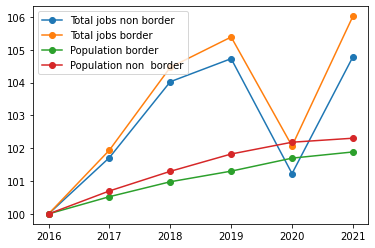

In [25]:
# Create a graphic 

x1 = dfchange_nonborder1621["Year"]
y1 = dfchange_nonborder1621["Total Jobs"]

x2 = dfchange_border1621["Year"]
y2 = dfchange_border1621["Total Jobs"]

x3 = dfchange_border1621["Year"]
y3 = dfchange_border1621["Population"]

x4 = dfchange_border1621["Year"]
y4 = dfchange_nonborder1621["Population"]


fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Total jobs non border")
ax.plot(x2, y2, marker = "o", label = "Total jobs border")
ax.plot(x3, y3, marker = "o", label = "Population border")
ax.plot(x4, y4, marker = "o", label = "Population non  border")

ax.legend()

# plt.show()

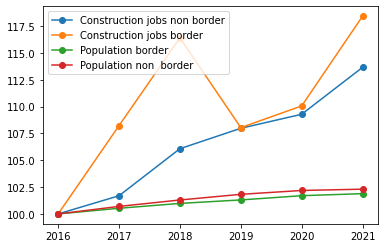

In [26]:
# Create a graphic 

x1 = dfchange_nonborder1621["Year"]
y1 = dfchange_nonborder1621["Construction Jobs"]

x2 = dfchange_border1621["Year"]
y2 = dfchange_border1621["Construction Jobs"]

x3 = dfchange_border1621["Year"]
y3 = dfchange_border1621["Population"]

x4 = dfchange_border1621["Year"]
y4 = dfchange_nonborder1621["Population"]


fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Construction jobs non border")
ax.plot(x2, y2, marker = "o", label = "Construction jobs border")
ax.plot(x3, y3, marker = "o", label = "Population border")
ax.plot(x4, y4, marker = "o", label = "Population non  border")

ax.legend()

# plt.show()

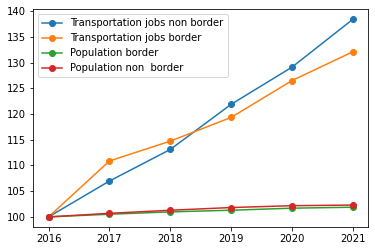

In [27]:
# Create a graphic 

x1 = dfchange_nonborder1621["Year"]
y1 = dfchange_nonborder1621["Transportation Jobs"]

x2 = dfchange_border1621["Year"]
y2 = dfchange_border1621["Transportation Jobs"]

x3 = dfchange_border1621["Year"]
y3 = dfchange_border1621["Population"]

x4 = dfchange_border1621["Year"]
y4 = dfchange_nonborder1621["Population"]


fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Transportation jobs non border")
ax.plot(x2, y2, marker = "o", label = "Transportation jobs border")
ax.plot(x3, y3, marker = "o", label = "Population border")
ax.plot(x4, y4, marker = "o", label = "Population non  border")

ax.legend()

# plt.show()

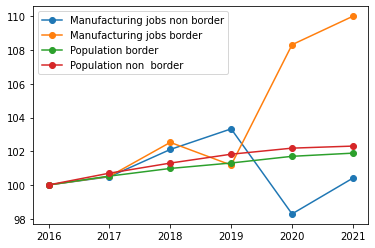

In [28]:
# Create a graphic 

x1 = dfchange_nonborder1621["Year"]
y1 = dfchange_nonborder1621["Manufacturing Jobs"]

x2 = dfchange_border1621["Year"]
y2 = dfchange_border1621["Manufacturing Jobs"]

x3 = dfchange_border1621["Year"]
y3 = dfchange_border1621["Population"]

x4 = dfchange_border1621["Year"]
y4 = dfchange_nonborder1621["Population"]


fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Manufacturing jobs non border")
ax.plot(x2, y2, marker = "o", label = "Manufacturing jobs border")
ax.plot(x3, y3, marker = "o", label = "Population border")
ax.plot(x4, y4, marker = "o", label = "Population non  border")

ax.legend()

# plt.show()

### Income

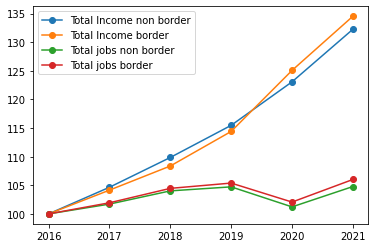

In [29]:
# Create a graphic 

x1 = dfchange_nonborder1621["Year"]
y1 = dfchange_nonborder1621["Total Income"]

x2 = dfchange_border1621["Year"]
y2 = dfchange_border1621["Total Income"]

x3 = dfchange_nonborder1621["Year"]
y3 = dfchange_nonborder1621["Total Jobs"]

x4 = dfchange_border1621["Year"]
y4 = dfchange_border1621["Total Jobs"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Total Income non border")
ax.plot(x2, y2, marker = "o", label = "Total Income border")
ax.plot(x3, y3, marker = "o", label = "Total jobs non border")
ax.plot(x4, y4, marker = "o", label = "Total jobs border")

ax.legend()

# plt.show()

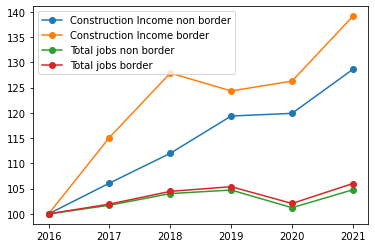

In [30]:
# Create a graphic 

x1 = dfchange_nonborder1621["Year"]
y1 = dfchange_nonborder1621["Construction Income"]

x2 = dfchange_border1621["Year"]
y2 = dfchange_border1621["Construction Income"]

x3 = dfchange_nonborder1621["Year"]
y3 = dfchange_nonborder1621["Total Jobs"]

x4 = dfchange_border1621["Year"]
y4 = dfchange_border1621["Total Jobs"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Construction Income non border")
ax.plot(x2, y2, marker = "o", label = "Construction Income border")
ax.plot(x3, y3, marker = "o", label = "Total jobs non border")
ax.plot(x4, y4, marker = "o", label = "Total jobs border")

ax.legend()

# plt.show()

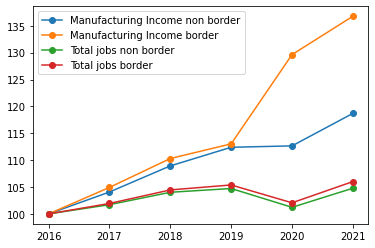

In [31]:
# Create a graphic 

x1 = dfchange_nonborder1621["Year"]
y1 = dfchange_nonborder1621["Manufacturing Income"]

x2 = dfchange_border1621["Year"]
y2 = dfchange_border1621["Manufacturing Income"]

x3 = dfchange_nonborder1621["Year"]
y3 = dfchange_nonborder1621["Total Jobs"]

x4 = dfchange_border1621["Year"]
y4 = dfchange_border1621["Total Jobs"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Manufacturing Income non border")
ax.plot(x2, y2, marker = "o", label = "Manufacturing Income border")
ax.plot(x3, y3, marker = "o", label = "Total jobs non border")
ax.plot(x4, y4, marker = "o", label = "Total jobs border")

ax.legend()

# plt.show()

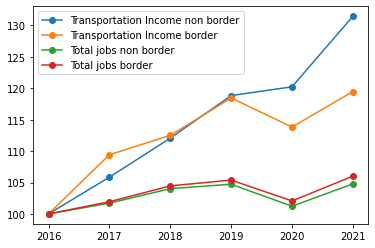

In [32]:
# Create a graphic 

x1 = dfchange_nonborder1621["Year"]
y1 = dfchange_nonborder1621["Transportation Income"]

x2 = dfchange_border1621["Year"]
y2 = dfchange_border1621["Transportation Income"]

x3 = dfchange_nonborder1621["Year"]
y3 = dfchange_nonborder1621["Total Jobs"]

x4 = dfchange_border1621["Year"]
y4 = dfchange_border1621["Total Jobs"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Transportation Income non border")
ax.plot(x2, y2, marker = "o", label = "Transportation Income border")
ax.plot(x3, y3, marker = "o", label = "Total jobs non border")
ax.plot(x4, y4, marker = "o", label = "Total jobs border")

ax.legend()

# plt.show()

In [33]:
#Summary

In [35]:
dftotal = pd.pivot_table(df.query("Year > 2006 & Year < 2022") , values='Value', index='Year', columns=['Description',"Border County"])
dftotal

Description   Construction Income            Construction Jobs            \
Border County                  No        Yes                No       Yes   
Year                                                                       
2007                   203,002.25 579,333.00          3,906.13 11,470.33   
2008                   190,121.17 476,368.17          3,720.82 10,514.58   
2009                   166,693.39 422,759.21          3,250.20  9,149.88   
2010                   167,435.66 479,108.74          3,014.38  8,922.57   
2011                   171,056.41 437,572.48          3,009.64  8,825.30   
2012                   185,203.03 483,133.68          3,080.71  9,321.86   
2013                   194,770.03 491,874.30          3,200.87  9,302.22   
2014                   211,843.76 542,308.35          3,317.69  9,680.35   
2015                   224,541.89 520,889.20          3,382.13  9,211.96   
2016                   236,332.97 561,504.36          3,570.92  9,944.72   
2017                   250,736.45 646,391.50          3,631.33 10,762.25   
2018                   264,681.53 718,032.26          3,787.74 11,575.61   
2019                   282,122.56 698,136.56          3,855.61 10,743.96   
2020                   283,365.69 709,125.08          3,902.24 10,944.44   
2021                   303,966.23 781,167.50          4,058.24 11,775.17   

Description   Manufacturing Income            Manufacturing Jobs           \
Border County                   No        Yes                 No      Yes   
Year                                                                        
2007                    342,024.97 657,294.75           5,058.34 9,383.38   
2008                    324,364.49 553,933.82           4,669.76 7,863.18   
2009                    305,173.62 595,631.46           4,395.52 8,469.42   
2010                    309,092.72 578,163.52           4,254.26 7,852.12   
2011                    326,081.21 618,832.25           4,353.68 8,251.96   
2012                    338,673.27 692,096.00           4,425.81 8,741.30   
2013                    344,027.69 660,067.08           4,482.53 8,487.25   
2014                    358,549.40 690,760.46           4,537.73 8,480.33   
2015                    372,178.30 718,067.40           4,583.68 8,480.84   
2016                    371,734.92 721,115.56           4,623.91 8,676.24   
2017                    386,877.17 756,618.88           4,646.36 8,720.44   
2018                    404,937.95 795,408.08           4,721.21 8,895.36   
2019                    417,817.43 815,095.35           4,777.72 8,778.42   
2020                    418,779.76 934,828.25           4,544.47 9,397.88   
2021                    441,262.66 986,268.00           4,642.63 9,544.33   

Description   Population            Total Income               Total Jobs  \
Border County         No        Yes           No           Yes         No   
Year                                                                        
2007           94,818.77 262,076.43 3,785,261.56  9,067,546.30  48,177.95   
2008           95,666.46 266,552.57 3,929,453.06  9,455,756.10  47,955.39   
2009           96,451.44 270,774.70 3,799,586.02  9,325,069.63  46,139.92   
2010           97,240.59 275,312.33 3,960,065.18  9,779,417.40  45,905.03   
2011           97,996.88 278,714.00 4,193,896.68 10,341,940.07  47,031.69   
2012           98,774.02 281,369.13 4,406,749.53 10,775,784.13  48,004.26   
2013           99,524.74 283,257.03 4,465,174.02 11,029,007.20  49,070.94   
2014          100,322.05 285,530.90 4,711,344.13 11,609,462.73  50,306.15   
2015          101,130.60 287,427.80 4,935,706.06 12,159,730.20  51,562.07   
2016          101,931.57 289,488.83 5,065,416.82 12,489,752.53  52,469.67   
2017          102,644.75 291,007.83 5,301,045.38 13,008,322.80  53,369.38   
2018          103,253.33 292,322.33 5,564,764.70 13,534,617.80  54,581.23   
2019          103,790.55 293,258.53 5,849,112.58 14,288,996.03  54,949.60   
2020        

In [36]:
descriptions = df["Description"].unique()
descriptions

array(['Total Jobs', 'Construction Jobs', 'Manufacturing Jobs',
       'Transportation Jobs', 'Total Income', 'Construction Income',
       'Manufacturing Income', 'Transportation Income', 'Population'],
      dtype=object)

In [37]:
dftotalchange = dftotal.copy()
for i in descriptions:
    for j in ["Yes", "No"]:
        dftotalchange[(i,j)] = dftotal[(i,j)] / dftotal[(i,j)].iat[0] * 100 -100

In [38]:
dftotalchange["Year"] = dftotalchange.index
dftotalchange

Description   Construction Income        Construction Jobs         \
Border County                  No    Yes                No    Yes   
Year                                                                
2007                         0.00   0.00              0.00   0.00   
2008                        -6.35 -17.77             -4.74  -8.33   
2009                       -17.89 -27.03            -16.79 -20.23   
2010                       -17.52 -17.30            -22.83 -22.21   
2011                       -15.74 -24.47            -22.95 -23.06   
2012                        -8.77 -16.61            -21.13 -18.73   
2013                        -4.06 -15.10            -18.06 -18.90   
2014                         4.36  -6.39            -15.06 -15.61   
2015                        10.61 -10.09            -13.41 -19.69   
2016                        16.42  -3.08             -8.58 -13.30   
2017                        23.51  11.58             -7.04  -6.17   
2018                        30.38  23.94             -3.03   0.92   
2019                        38.98  20.51             -1.29  -6.33   
2020                        39.59  22.40             -0.10  -4.58   
2021                        49.74  34.84              3.89   2.66   

Description   Manufacturing Income        Manufacturing Jobs         \
Border County                   No    Yes                 No    Yes   
Year                                                                  
2007                          0.00   0.00               0.00   0.00   
2008                         -5.16 -15.73              -7.68 -16.20   
2009                        -10.77  -9.38             -13.10  -9.74   
2010                         -9.63 -12.04             -15.90 -16.32   
2011                         -4.66  -5.85             -13.93 -12.06   
2012                         -0.98   5.29             -12.50  -6.84   
2013                          0.59   0.42             -11.38  -9.55   
2014                          4.83   5.09             -10.29  -9.62   
2015                          8.82   9.25              -9.38  -9.62   
2016                          8.69   9.71              -8.59  -7.54   
2017                         13.11  15.11              -8.14  -7.06   
2018                         18.39  21.01              -6.66  -5.20   
2019                         22.16  24.01              -5.55  -6.45   
2020                         22.44  42.22             -10.16   0.15   
2021                         29.01  50.05              -8.22   1.72   

Description   Population       Total Income       Total Jobs        \
Border County         No   Yes           No   Yes         No   Yes   
Year                                                                 
2007                0.00  0.00         0.00  0.00       0.00  0.00   
2008                0.89  1.71         3.81  4.28      -0.46 -0.50   
2009                1.72  3.32         0.38  2.84      -4.23 -3.61   
2010                2.55  5.05         4.62  7.85      -4.72 -4.06   
2011                3.35  6.35        10.80 14.05      -2.38 -1.69   
2012                4.17  7.36        16.42 18.84      -0.36  0.50   
2013                4.96  8.08        17.96 21.63       1.85  2.94   
2014                5.80  8.95        24.47 28.03       4.42  5.79   
2015                6.66  9.67        30.39 34.10       7.02  8.62   
2016                7.50 10.46        33.82 37.74       8.91 10.79   
2017                8.25 11.04        40.04 43.46      10.78 12.94   
2018                8.90 11.54        47.01 49.26      13.29 15.73   
2019                9.46 11.90        54.52 57.58      14.06 16.75   
2020                9.85 12.34        64.69 72.27      10.25 13.08   
2021                9.98 12.54        76.98 85.30      14.12 17.45   

Description   Transportation Income        Transportation Jobs         Year  
Border County                    No    Yes                  No    Yes        
Year                                                         

In [39]:
dftotalchange_melted = pd.melt(dftotalchange, id_vars=["Year"]).copy()
dftotalchange_melted.rename(columns = {"value": "Change"}, inplace = True)
dftotalchange_melted

,Year,Description,Border County,Change
0,2007,Construction Income,No,0.00
1,2008,Construction Income,No,-6.35
2,2009,Construction Income,No,-17.89
3,2010,Construction Income,No,-17.52
4,2011,Construction Income,No,-15.74
...,...,...,...,...
265,2017,Transportation Jobs,Yes,42.27
266,2018,Transportation Jobs,Yes,47.23
267,2019,Transportation Jobs,Yes,53.15
268,2020,Transportation Jobs,Yes,62.34


In [41]:
dfsummary = pd.pivot_table(dftotalchange_melted.query("Year == 2021") , values='Change', index='Description', columns='Border County')
dfsummary

Border County,No,Yes
Description,,
Construction Income,49.74,34.84
Construction Jobs,3.89,2.66
Manufacturing Income,29.01,50.05
Manufacturing Jobs,-8.22,1.72
Population,9.98,12.54
Total Income,76.98,85.30
Total Jobs,14.12,17.45
Transportation Income,84.08,71.14
Transportation Jobs,77.33,69.54


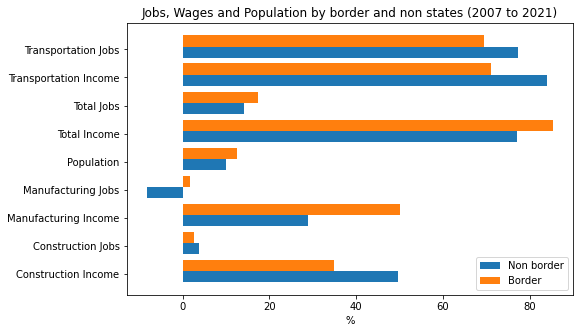

In [42]:
import matplotlib.pyplot as plt

# Datos de las series
serie1 = dfsummary['No']
serie2 = dfsummary['Yes']

# Crear los índices para las barras
ind = np.arange(len(dfsummary['No']))

# Configurar el tamaño de la figura
fig, ax = plt.subplots(figsize=(8, 5))

# Crear las barras para la serie 1
ax.barh(ind - 0.1, dfsummary['No'], height=0.4, align='center', label='Non border')

# Crear las barras para la serie 2
ax.barh(ind + 0.1, dfsummary['Yes'], height=0.4, align='edge', label='Border')

# Configurar los ejes y etiquetas
ax.set_xlabel('%')
ax.set_title('Jobs, Wages and Population by border and non states (2007 to 2021)')
ax.set_yticks(ind)
ax.set_yticklabels(dfsummary.index)

# Agregar una leyenda
ax.legend()

# Mostrar el gráfico de barras horizontal
plt.show()

### Conclusions (to do)
For the period 2007 to 2021, the southern border had better economic performance than the rest of the country. This is a period that coincides with the beginning of long-term reshoring and nearshoring (and does not consider the drop in activity due to the 2008 crisis).

There was a higher increase in both employment (23%) and the wage bill (86%) in the border states than in the non-border states (12% employment and 58% wages).

There were sectors where this was more pronounced. In transportation and warehousing, employment increased 107% and wages 120% in the border states. In the non-border states, employment increased by 67% and wages by 71%.

In construction, employment on the border increased by 9% and wages by 54%, while in non-border areas employment did not vary (in the total period) and the wage bill increased by 43%. It is worth clarifying that the comparison with 2007 includes a slump due to the crisis and a rapid recovery thereafter.

In manufacturing, there was an 8% drop in employment at the border and a 47% increase in wages. Non-border employment also fell, by 7%, and wages rose less, by 27%.

Relative to population, total employment on the border grew considerably faster. In the non-border states, it also increased, but at a slightly higher rate than population growth.

Construction grew less than the population in the total period but included a sharp drop starting in 2008.

Transportation jobs skyrocketed more than the population, both on and off the border. But faster at the border.

Manufacturing employment grew less than the population in both cases. Includes a 2008 collapse.

Total wages (the sum) grew faster than employment nationally but at a higher rate at the border. This means that the average wage also grew.

This was repeated in all sectors analyzed. 

Transportation saw an increase almost equal. So there was no increase in the average wage.


### Post 2015

In [43]:
dftotalchange1621 = dftotal.copy()
for i in descriptions:
    for j in ["Yes", "No"]:
        dftotalchange1621[(i,j)] = dftotal[(i,j)] / dftotal[(i,j)].iat[9] * 100 -100
        

In [44]:
dftotalchange1621["Year"] = dftotalchange1621.index
dftotalchange1621

Description   Construction Income        Construction Jobs         \
Border County                  No    Yes                No    Yes   
Year                                                                
2007                       -14.10   3.18              9.39  15.34   
2008                       -19.55 -15.16              4.20   5.73   
2009                       -29.47 -24.71             -8.98  -7.99   
2010                       -29.15 -14.67            -15.59 -10.28   
2011                       -27.62 -22.07            -15.72 -11.26   
2012                       -21.63 -13.96            -13.73  -6.26   
2013                       -17.59 -12.40            -10.36  -6.46   
2014                       -10.36  -3.42             -7.09  -2.66   
2015                        -4.99  -7.23             -5.29  -7.37   
2016                         0.00   0.00              0.00   0.00   
2017                         6.09  15.12              1.69   8.22   
2018                        12.00  27.88              6.07  16.40   
2019                        19.38  24.33              7.97   8.04   
2020                        19.90  26.29              9.28  10.05   
2021                        28.62  39.12             13.65  18.41   

Description   Manufacturing Income        Manufacturing Jobs       Population  \
Border County                   No    Yes                 No   Yes         No   
Year                                                                            
2007                         -7.99  -8.85               9.40  8.15      -6.98   
2008                        -12.74 -23.18               0.99 -9.37      -6.15   
2009                        -17.91 -17.40              -4.94 -2.38      -5.38   
2010                        -16.85 -19.82              -7.99 -9.50      -4.60   
2011                        -12.28 -14.18              -5.84 -4.89      -3.86   
2012                         -8.89  -4.02              -4.28  0.75      -3.10   
2013                         -7.45  -8.47              -3.06 -2.18      -2.36   
2014                         -3.55  -4.21              -1.86 -2.26      -1.58   
2015                          0.12  -0.42              -0.87 -2.25      -0.79   
2016                          0.00   0.00               0.00  0.00       0.00   
2017                          4.07   4.92               0.49  0.51       0.70   
2018                          8.93  10.30               2.10  2.53       1.30   
2019                         12.40  13.03               3.33  1.18       1.82   
2020                         12.66  29.64              -1.72  8.32       2.18   
2021                         18.70  36.77               0.40 10.01       2.30   

Description         Total Income        Total Jobs         \
Border County   Yes           No    Yes         No    Yes   
Year                                                        
2007          -9.47       -25.27 -27.40      -8.18  -9.74   
2008          -7.92       -22.43 -24.29      -8.60 -10.18   
2009          -6.46       -24.99 -25.34     -12.06 -12.99   
2010          -4.90       -21.82 -21.70     -12.51 -13.40   
2011          -3.72       -17.21 -17.20     -10.36 -11.26   
2012          -2.80       -13.00 -13.72      -8.51  -9.29   
2013          -2.15       -11.85 -11.70      -6.48  -7.09   
2014          -1.37        -6.99  -7.05      -4.12  -4.51   
2015          -0.71        -2.56  -2.64      -1.73  -1.95   
2016           0.00         0.00   0.00       0.00   0.00   
2017           0.52         4.65   4.15       1.71   1.94   
2018           0.98         9.86   8.37       4.02   4.46   
2019           1.30        15.47  14.41       4.73   5.39   
2020           1.70        23.07  25.06       1.23   2.07   
2021           1.89        32.25  34.53       4.78   6.02   

Description   Transportation Income        Transportation Jobs         Year  
Border County                    No    Yes                  No    Yes        
Year                                       

In [45]:
dftotalchange1621_melted = pd.melt(dftotalchange1621, id_vars=["Year"]).copy()
dftotalchange1621_melted.rename(columns = {"value": "Change"}, inplace = True)
dftotalchange1621_melted

,Year,Description,Border County,Change
0,2007,Construction Income,No,-14.10
1,2008,Construction Income,No,-19.55
2,2009,Construction Income,No,-29.47
3,2010,Construction Income,No,-29.15
4,2011,Construction Income,No,-27.62
...,...,...,...,...
265,2017,Transportation Jobs,Yes,10.87
266,2018,Transportation Jobs,Yes,14.74
267,2019,Transportation Jobs,Yes,19.35
268,2020,Transportation Jobs,Yes,26.51


In [47]:
dfsummary1621 = pd.pivot_table(dftotalchange1621_melted.query("Year == 2021") , values='Change', index='Description', columns='Border County')
dfsummary1621

Border County,No,Yes
Description,,
Construction Income,28.62,39.12
Construction Jobs,13.65,18.41
Manufacturing Income,18.70,36.77
Manufacturing Jobs,0.40,10.01
Population,2.30,1.89
Total Income,32.25,34.53
Total Jobs,4.78,6.02
Transportation Income,31.47,19.49
Transportation Jobs,38.43,32.12


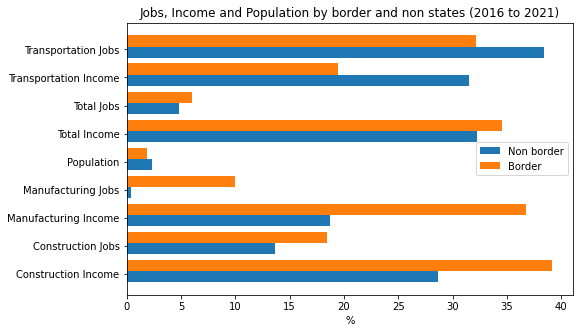

In [48]:
import matplotlib.pyplot as plt

# Datos de las series
serie1 = dfsummary1621['No']
serie2 = dfsummary1621['Yes']

# Crear los índices para las barras
ind = np.arange(len(dfsummary['No']))

# Configurar el tamaño de la figura
fig, ax = plt.subplots(figsize=(8, 5))

# Crear las barras para la serie 1
ax.barh(ind - 0.1, dfsummary1621['No'], height=0.4, align='center', label='Non border')

# Crear las barras para la serie 2
ax.barh(ind + 0.1, dfsummary1621['Yes'], height=0.4, align='edge', label='Border')

# Configurar los ejes y etiquetas
ax.set_xlabel('%')
ax.set_title('Jobs, Income and Population by border and non states (2016 to 2021)')
ax.set_yticks(ind)
ax.set_yticklabels(dfsummary1621.index)

# Agregar una leyenda
ax.legend()

# Mostrar el gráfico de barras horizontal
plt.show()

### Conclusions
For the period 2016 to 2021, there was also better economic performance in the south than in the rest of the country. This is a period of increasing tension between China and the America. It is expected that nearshoring and reshoring will accelerate thereafter.

Employment (7%) and wages  (37%) increased more in the border states than outside the border states (4% employment and 26% wages).

There were sectors where this was more pronounced. In transportation and warehousing, employment increased by 47% and wages by 56% on the border. In non-border states, employment increased by 38% and wages by 34%.

In construction, border employment increased by 15% and wages by 34%. In non-border states, employment increased by 12% (in the total period) and wages rose by 30%.

Manufacturing employment outside the border increased faster (3%) but wages did not (19%). At the border, employment increased by less than 1% and wages by 29%.

Total wages (the sum) grew faster than employment than the population both on and off the border. This means that the average wage has increased. Border states registered more significant increases than non-border states.

Border states' jobs grew faster than the population. In the non-border states, workers increased as well, but slightly faster than population growth. This includes the sharp drop due to the pandemic.

Construction jobs rise more than the population, both on and off the border. Border states grew faster.

Something similar happened in transportation but on a significantly larger scale.

Manufacturing employment was uneven. Compared to the population, it grew less on the border, whereas it grew similarly in non-border states. 